In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
#merge_table_copy = pd.merge(clinical_trial_df, mouse_drug_df,on=["Mouse ID","Mouse ID",how='left')
clinical_data = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID"])


# Display the data table for preview
clinical_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [24]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_data=clinical_data.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
tumor_volume_mean=pd.DataFrame(tumor_response_data)
# Preview DataFrame
tumor_volume_mean.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [25]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_df=clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_volume_SE=pd.DataFrame(SE_df)
# Preview DataFrame
tumor_volume_SE.reset_index().head()
#tumor_volume_SE.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [27]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_SE=clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_volume_SE=pd.DataFrame(tumor_volume_SE)
# Preview DataFrame
tumor_volume_SE.reset_index().head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [28]:
tumor_volume_mean=tumor_volume_mean.reset_index()
#tumor_volume_mean.head()
tumor_volume_mean_pivot=tumor_volume_mean.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]
tumor_volume_mean_pivot.head()
#tumor_volume_mean_pivot.iloc[-1]
#new_df=tumor_volume_mean.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [29]:
tumor_volume_SE=tumor_volume_SE.reset_index()
tumor_volume_SE_pivot=tumor_volume_SE.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]
tumor_volume_SE_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


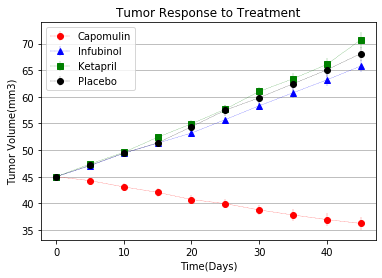

In [47]:

x_axis=tumor_volume_mean_pivot.index
y1_axis=tumor_volume_mean_pivot["Capomulin"]
y2_axis=tumor_volume_mean_pivot["Infubinol"]
y3_axis=tumor_volume_mean_pivot["Ketapril"]
y4_axis=tumor_volume_mean_pivot["Placebo"]
err1=tumor_volume_SE_pivot["Capomulin"]
err2=tumor_volume_SE_pivot["Infubinol"]
err3=tumor_volume_SE_pivot["Ketapril"]
err4=tumor_volume_SE_pivot["Placebo"]
plt.errorbar(x_axis,y1_axis,err1,color="r", marker="o", linestyle="dashed",linewidth=0.25)
plt.errorbar(x_axis,y2_axis,err2,color="b", marker="^", linestyle="dashed",linewidth=0.25)
plt.errorbar(x_axis,y3_axis,err3,color="g", marker="s", linestyle="dashed",linewidth=0.25)
plt.errorbar(x_axis,y4_axis,err4,color="black", marker="o", linestyle="dashed",linewidth=0.25)
#plt.grid()
plt.grid(axis='y')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'],loc='best',fancybox=True)
plt.savefig("analysis/figure1.png")
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [31]:
clinical_data.columns
Metastatic_Sites_mean=clinical_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
Metastatic_Sites_mean=pd.DataFrame(Metastatic_Sites_mean)
#tumor_volume_mean=pd.DataFrame(mean_df["Tumor Volume (mm3)"].mean())
Metastatic_Sites_mean.head()
Metastatic_Sites_mean.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


## clinical_data.columns

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [32]:
Metastatic_Sites_SE=clinical_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
Metastatic_Sites_SE=pd.DataFrame(Metastatic_Sites_SE)
#tumor_volume_mean=pd.DataFrame(mean_df["Tumor Volume (mm3)"].mean())
Metastatic_Sites_SE.head()
Metastatic_Sites_SE.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [17]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [33]:
Metastatic_Sites_mean=Metastatic_Sites_mean.reset_index()
Metastatic_Sites_mean.head()
Metastatic_Sites_mean_pivot=Metastatic_Sites_mean.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]
#new_df=tumor_volume_mean.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
Metastatic_Sites_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [34]:
#madhavi
Metastatic_Sites_SE=Metastatic_Sites_SE.reset_index()
Metastatic_Sites_SE.head()
Metastatic_Sites_SE_pivot=Metastatic_Sites_SE.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]
#new_df=tumor_volume_mean.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
Metastatic_Sites_SE_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [20]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


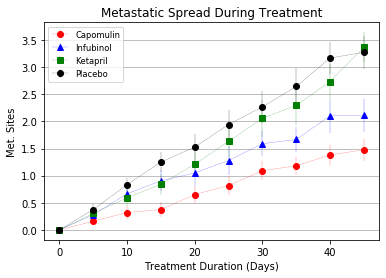

In [46]:
#madhavi code review
x_value=Metastatic_Sites_mean_pivot.index
y1_value=Metastatic_Sites_mean_pivot["Capomulin"]
y2_value=Metastatic_Sites_mean_pivot["Infubinol"]
y3_value=Metastatic_Sites_mean_pivot["Ketapril"]
y4_value=Metastatic_Sites_mean_pivot["Placebo"]
err1_value=Metastatic_Sites_SE_pivot["Capomulin"]
err2_value=Metastatic_Sites_SE_pivot["Infubinol"]
err3_value=Metastatic_Sites_SE_pivot["Ketapril"]
err4_value=Metastatic_Sites_SE_pivot["Placebo"]
plt.errorbar(x_value,y1_value,err1_value,color="r", marker="o", linestyle="dashed",linewidth=0.25)
plt.errorbar(x_value,y2_value,err2_value,color="b", marker="^", linestyle="dashed",linewidth=0.25)
plt.errorbar(x_value,y3_value,err3_value,color="g", marker="s", linestyle="dashed",linewidth=0.25)
plt.errorbar(x_value,y4_value,err4_value,color="black", marker="o", linestyle="dashed",linewidth=0.25)
#plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)
plt.savefig("analysis/figure2.png")
plt.show()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [37]:
clinical_data.head()
mice_count=clinical_data.groupby(["Drug" ,"Timepoint"])["Mouse ID"].count()
#mice_count_df=pd.DataFrame(mice_count)
survival_rates_df=pd.DataFrame(mice_count)
survival_rates_df.rename(columns = {'Mouse ID':'Mouse Count'}, inplace = True) 
survival_rates_df.columns
survival_rates_df.reset_index().head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [38]:

survival_rates=survival_rates_df.reset_index()
survival_rates_pivot=survival_rates.pivot(index="Timepoint",columns='Drug')['Mouse Count']
survival_rates_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [ ]:
survival_rates_pivot.columns

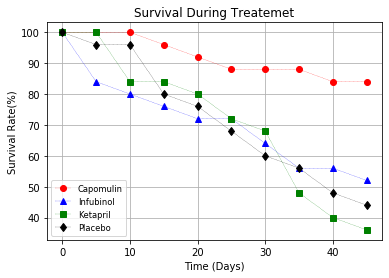

In [59]:
plt.plot(survival_rates_pivot.index,100*survival_rates_pivot["Capomulin"]/25,linestyle="dashed",color='r',linewidth=0.25,marker='o')
plt.plot(survival_rates_pivot.index,100*survival_rates_pivot["Ceftamin"]/25,linestyle="dashed",color='blue',linewidth=0.25,marker='^')
plt.plot(survival_rates_pivot.index,100*survival_rates_pivot["Infubinol"]/25,linestyle="dashed",color='green',linewidth=0.25,marker='s')
plt.plot(survival_rates_pivot.index,100*survival_rates_pivot["Placebo"]/25,linestyle="dashed",color='black',linewidth=0.25,marker='d')
plt.grid()
plt.title("Survival During Treatemet")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)
plt.savefig("analysis/figure3.png")

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [40]:
#madhavi code
tumor_vol_mean_change_per=100*(tumor_volume_mean_pivot.iloc[-1]-tumor_volume_mean_pivot.iloc[0])/(tumor_volume_mean_pivot.iloc[0])
#tumor_vol_SE_change_per=100*(tumor_volume_SE_pivot.iloc[-1]-tumor_volume_SE_pivot.iloc[0])/(tumor_volume_SE_pivot.iloc[0])
tumor_vol_mean_change_per

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [49]:
per_changes=(tumor_vol_mean_change_per["Capomulin"],
             tumor_vol_mean_change_per["Ceftamin"],
             tumor_vol_mean_change_per["Infubinol"],
             tumor_vol_mean_change_per["Placebo"])
#per_changes            

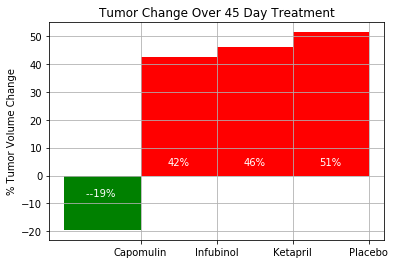

In [60]:
fig, ax = plt.subplots()
ind = np.arange(len(per_changes))  
width = 1
rectsPass = ax.bar(ind[0], per_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], per_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("analysis/figure4.png")

# Show the Figure
fig.show()